In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [1]:
import statistics as st
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys


def Search_Some(dataset,some):
  dic={}
  for col in tqdm(list(dataset.columns)):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows

  return dic



def find_stat_classwise(dataframe,col,target_col,temp_tar,stat_type='median'):
  print("Calculating-",col,"|| Target-",temp_tar)
  list_1 = []
  for row in range(dataframe.shape[0]):
      if str(dataframe[col][row]) != 'nan' and str(dataframe[target_col][row]) == temp_tar:
        list_1.append(dataframe[col][row])

  try:
    if stat_type == 'median':
      return st.median(list_1)
    elif stat_type == 'mean':
      return st.mean(list_1)
    elif stat_type == 'mode':
      return st.mode(list_1)

  except:
    print("No Class exist")
    return 'nan'



def clsswise_null_rmv(df,target_cls,stat_type='median'):

  cls = list(set(df[target_cls]))

  refine = []
  print("Processing Null Dictionary.....")
  d_null = Search_Some(df,'nan')

  print("Replacing Nan vlues with ",stat_type,".....")
  for col in tqdm(d_null):
    for c in cls:
      m = find_stat_classwise(df,col,target_cls,c,stat_type)
      refine.append([col,c,m])

  for i in refine:
    print(i)
    for row in tqdm(range(df.shape[0])):
      if str(df[i[0]][row]) == 'nan' and str(df[target_cls][row]) == i[1]:
        df.at[row,i[0]] = i[2]

  return df

In [2]:
dataset=pd.read_csv("C:/Users/Richard/Desktop/VitalDB/Vital_ECG_MAP_features_120s.csv")
result = {}

In [3]:
dataset

,Case_ID,Segment,ST_II,ART_MBP,ART_SBP,ART_DBP,Cycle,R_wave_amplitude,ΔR_wave_amplitude,R_wave_duration,...,ST_duration,ΔST_duration,ST_area,ΔST_area,ST_slope,ΔST_slope,Ischemia_Status,ART_MAP,Hypotension_Status,Class
0,1,2,-0.586322,65.986667,102.516667,43.956667,1,0.103551,-0.013308,0.030474,...,NaN,NaN,NaN,NaN,NaN,NaN,Non-ischemia,63.476667,Hypotension,Non_isc-Hypo
1,1,2,-0.586322,65.986667,102.516667,43.956667,2,0.093742,-0.003500,0.091421,...,0.010158,0.040748,0.001223,-0.001585,NaN,NaN,Non-ischemia,63.476667,Hypotension,Non_isc-Hypo
2,1,2,-0.586322,65.986667,102.516667,43.956667,3,0.117667,-0.027424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Non-ischemia,63.476667,Hypotension,Non_isc-Hypo
3,1,2,-0.586322,65.986667,102.516667,43.956667,4,0.096139,-0.005896,0.040631,...,0.010158,0.040748,0.001255,-0.001617,NaN,NaN,Non-ischemia,63.476667,Hypotension,Non_isc-Hypo
4,1,2,-0.586322,65.986667,102.516667,43.956667,5,0.117185,-0.026942,0.081263,...,0.010158,0.040748,0.002008,-0.002370,NaN,NaN,Non-ischemia,63.476667,Hypotension,Non_isc-Hypo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527828,2645,3,-2.449826,95.113333,126.103333,70.180000,675,0.193847,-0.131411,0.020366,...,0.000000,0.160196,-0.001449,0.016728,NaN,NaN,Non-ischemia,88.821111,Non-Hypotension,Non_isc-Non_Hypo
1527829,2645,3,-2.449826,95.113333,126.103333,70.180000,676,0.270201,-0.207766,0.020366,...,0.193476,-0.033280,NaN,NaN,0.005185,0.007804,Non-ischemia,88.821111,Non-Hypotension,Non_isc-Non_Hypo
1527830,2645,3,-2.449826,95.113333,126.103333,70.180000,677,NaN,NaN,NaN,...,0.193476,-0.033280,-0.017070,0.032349,0.005185,0.007804,Non-ischemia,88.821111,Non-Hypotension,Non_isc-Non_Hypo
1527831,2645,3,-2.449826,95.113333,126.103333,70.180000,678,0.120379,-0.057943,0.040732,...,0.010183,0.150013,0.004469,0.010810,NaN,NaN,Non-ischemia,88.821111,Non-Hypotension,Non_isc-Non_Hypo


#Adding Class Column in Dataset

In [5]:
dataset["Class"]=''

for i in range(dataset.shape[0]):
  if dataset["Ischemia_Status"][i]=="Ischemia" and dataset["Hypotension_Status"][i]=="Hypotension":
    dataset["Class"][i]="Isc-Hypo"
  elif dataset["Ischemia_Status"][i]=="Non-ischemia" and dataset["Hypotension_Status"][i]=="Non-Hypotension":
        dataset["Class"][i]="Non_isc-Non_Hypo"
  elif dataset["Ischemia_Status"][i]=="Non-ischemia" and dataset["Hypotension_Status"][i]=="Hypotension":
        dataset["Class"][i]="Non_isc-Hypo"
  elif dataset["Ischemia_Status"][i]=="Ischemia" and dataset["Hypotension_Status"][i]=="Non-Hypotension":
        dataset["Class"][i]="Isc-Non_Hypo"
  else:
    dataset["Class"][i]="Others"

C:\Users\Richard\AppData\Local\Temp\ipykernel_4364\2162255413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Class"][i]="Others"
C:\Users\Richard\AppData\Local\Temp\ipykernel_4364\2162255413.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Class"][i]="Non_isc-Hypo"
C:\Users\Richard\AppData\Local\Temp\ipykernel_4364\2162255413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Class"][i]="Isc-Hypo"
C

#REmoving All Normal Classes

In [2]:
dataset = dataset.query('Class != "Others"')
classes = np.array(sorted(list(set(dataset["Class"]))))

In [3]:
classes

array(['Isc-Hypo', 'Isc-Non_Hypo', 'Non_isc-Hypo', 'Non_isc-Non_Hypo'],
      dtype='<U16')

#Handiling NaN Values

In [5]:
dataset.isnull().sum()

Case_ID                    0
Segment                    0
ST_II                   7028
ART_MBP                    0
ART_SBP                    0
ART_DBP                    0
Cycle                      0
R_wave_amplitude       59959
ΔR_wave_amplitude      59959
R_wave_duration       417847
ΔR_wave_duration      417847
T_wave_amplitude      294009
ΔT_wave_amplitude     294009
T_wave_duration       312101
ΔT_wave_duration      312101
p_wave_duration       392323
ΔP_wave_duration      392323
S_wave_amplitude       92416
ΔS_wave_amplitude      92416
ST_amplitude          313831
ΔST_amplitude         313831
q_wave_amplitude      264762
Δq_wave_amplitude     264762
QT_interval           460355
ΔQT_interval          460355
Heart_rate                 0
ΔHeart_rate                0
J_point_amplitude     416386
ΔJ_point_amplitude    416386
ST_duration           416277
ΔST_duration          416277
ST_area               428212
ΔST_area              428212
ST_slope              701887
ΔST_slope     

In [6]:
for case_id in tqdm((list(set(dataset["Case_ID"])))):

    print("Case ID: ",case_id)
    temp_pos = dataset.query('Case_ID =='+str(case_id)+' and Class == "Isc-Hypo"')
    nan_col_pos = temp_pos.columns[temp_pos.isna().any()].tolist()

    for k in nan_col_pos:
      dataset.loc[(dataset['Case_ID']==case_id)& (dataset['Class'] == "Isc-Hypo") & (np.isnan(dataset[k])),k]=temp_pos[k].mean()



    temp_neg = dataset.query('Case_ID =='+str(case_id)+' and Class == "Non_isc-Hypo"')
    nan_col_neg = temp_neg.columns[temp_neg.isna().any()].tolist()

    for k in nan_col_neg:
      dataset.loc[(dataset['Case_ID']==case_id)& (dataset['Class'] == "Non_isc-Hypo") & (np.isnan(dataset[k])),k]=temp_neg[k].mean()


  0%|          | 0/407 [00:00<?, ?it/s]

Case ID:  1
Case ID:  4
Case ID:  2055
Case ID:  10
Case ID:  2061
Case ID:  2062
Case ID:  2064
Case ID:  17
Case ID:  2066
Case ID:  19
Case ID:  20
Case ID:  2068
Case ID:  22
Case ID:  2069
Case ID:  25
Case ID:  27
Case ID:  28
Case ID:  2082
Case ID:  2088
Case ID:  2098
Case ID:  2100
Case ID:  2106
Case ID:  2130
Case ID:  2132
Case ID:  2134
Case ID:  2136
Case ID:  2147
Case ID:  2149
Case ID:  2153
Case ID:  2154
Case ID:  2161
Case ID:  2164
Case ID:  2165
Case ID:  2168
Case ID:  2169
Case ID:  2172
Case ID:  2174
Case ID:  2182
Case ID:  2183
Case ID:  2185
Case ID:  2194
Case ID:  2197
Case ID:  2206
Case ID:  2210
Case ID:  2220
Case ID:  2225
Case ID:  2229
Case ID:  2238
Case ID:  2243
Case ID:  2246
Case ID:  2252
Case ID:  2258
Case ID:  2267
Case ID:  2280
Case ID:  2300
Case ID:  2304
Case ID:  2307
Case ID:  2310
Case ID:  2312
Case ID:  2318
Case ID:  2321
Case ID:  2323
Case ID:  2324
Case ID:  2326
Case ID:  2331
Case ID:  2332
Case ID:  2333
Case ID:  2336
Ca

In [7]:
dataset.isnull().sum()

Case_ID                    0
Segment                    0
ST_II                   6403
ART_MBP                    0
ART_SBP                    0
ART_DBP                    0
Cycle                      0
R_wave_amplitude       48210
ΔR_wave_amplitude      48210
R_wave_duration       362917
ΔR_wave_duration      362917
T_wave_amplitude      246513
ΔT_wave_amplitude     246513
T_wave_duration       262405
ΔT_wave_duration      262405
p_wave_duration       336374
ΔP_wave_duration      336374
S_wave_amplitude       76781
ΔS_wave_amplitude      76781
ST_amplitude          263573
ΔST_amplitude         263573
q_wave_amplitude      230136
Δq_wave_amplitude     230136
QT_interval           390247
ΔQT_interval          390247
Heart_rate                 0
ΔHeart_rate                0
J_point_amplitude     354038
ΔJ_point_amplitude    354038
ST_duration           353951
ΔST_duration          353951
ST_area               364635
ΔST_area              364635
ST_slope              593105
ΔST_slope     

In [8]:
dataset = dataset.dropna(axis=0, how='any')

#Encoding

In [9]:
dataset["Class"].value_counts()

Non_isc-Non_Hypo    465861
Non_isc-Hypo        176285
Isc-Non_Hypo         70672
Isc-Hypo             34755
Name: Class, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Class"]=encoder.fit_transform(dataset["Class"])

In [26]:
dataset["Class"].value_counts()

3    465861
2    176285
1     70672
0     34755
Name: Class, dtype: int64

In [27]:

!pip install ipywidgets
!pip install IPython
!pip install graphviz

import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

In [28]:

def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys
result={}


In [29]:
def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [16]:

all_columns = list(dataset.columns)
new_keys=items_check_box(all_columns)

Checkbox(value=False, description='Case_ID', indent=False)

Checkbox(value=False, description='Segment', indent=False)

Checkbox(value=False, description='ST_II', indent=False)

Checkbox(value=False, description='ART_MBP', indent=False)

Checkbox(value=False, description='ART_SBP', indent=False)

Checkbox(value=False, description='ART_DBP', indent=False)

Checkbox(value=False, description='Cycle', indent=False)

Checkbox(value=False, description='R_wave_amplitude', indent=False)

Checkbox(value=False, description='ΔR_wave_amplitude', indent=False)

Checkbox(value=False, description='R_wave_duration', indent=False)

Checkbox(value=False, description='ΔR_wave_duration', indent=False)

Checkbox(value=False, description='T_wave_amplitude', indent=False)

Checkbox(value=False, description='ΔT_wave_amplitude', indent=False)

Checkbox(value=False, description='T_wave_duration', indent=False)

Checkbox(value=False, description='ΔT_wave_duration', indent=False)

Checkbox(value=False, description='p_wave_duration', indent=False)

Checkbox(value=False, description='ΔP_wave_duration', indent=False)

Checkbox(value=False, description='S_wave_amplitude', indent=False)

Checkbox(value=False, description='ΔS_wave_amplitude', indent=False)

Checkbox(value=False, description='ST_amplitude', indent=False)

Checkbox(value=False, description='ΔST_amplitude', indent=False)

Checkbox(value=False, description='q_wave_amplitude', indent=False)

Checkbox(value=False, description='Δq_wave_amplitude', indent=False)

Checkbox(value=False, description='QT_interval', indent=False)

Checkbox(value=False, description='ΔQT_interval', indent=False)

Checkbox(value=False, description='Heart_rate', indent=False)

Checkbox(value=False, description='ΔHeart_rate', indent=False)

Checkbox(value=False, description='J_point_amplitude', indent=False)

Checkbox(value=False, description='ΔJ_point_amplitude', indent=False)

Checkbox(value=False, description='ST_duration', indent=False)

Checkbox(value=False, description='ΔST_duration', indent=False)

Checkbox(value=False, description='ST_area', indent=False)

Checkbox(value=False, description='ΔST_area', indent=False)

Checkbox(value=False, description='ST_slope', indent=False)

Checkbox(value=False, description='ΔST_slope', indent=False)

Checkbox(value=False, description='Ischemia_Status', indent=False)

Checkbox(value=False, description='ART_MAP', indent=False)

Checkbox(value=False, description='Hypotension_Status', indent=False)

Checkbox(value=False, description='Class', indent=False)

In [43]:
new_features = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    new_features.append(all_columns[i])

In [74]:
X = dataset[new_features]
y = dataset["Class"]
col=list(X.columns)

In [45]:
X

,Case_ID,Segment,ST_II,ART_MBP,ART_SBP,ΔR_wave_amplitude,R_wave_duration,ΔR_wave_duration,T_wave_amplitude,ΔT_wave_amplitude,...,S_wave_amplitude,ΔS_wave_amplitude,ΔST_amplitude,q_wave_amplitude,Δq_wave_amplitude,QT_interval,ΔQT_interval,ΔHeart_rate,ΔST_slope,ART_MAP
0,1,2,-0.586322,65.986667,102.516667,-0.013308,0.030474,-0.039374,-0.041614,0.101378,...,-0.041614,-0.012443,0.090375,0.042653,-0.055180,0.314894,-0.105544,-3.753000,-0.003783,63.476667
1,1,2,-0.586322,65.986667,102.516667,-0.003500,0.091421,-0.100321,0.060508,-0.000744,...,-0.033428,-0.020629,-0.019933,0.019686,-0.032212,0.243789,-0.034439,-6.738195,-0.003783,63.476667
2,1,2,-0.586322,65.986667,102.516667,-0.027424,-0.005888,-0.003012,-0.019423,0.079187,...,-0.019423,-0.034634,0.045993,0.008175,-0.020702,0.171902,0.037448,-4.737844,-0.003783,63.476667
3,1,2,-0.586322,65.986667,102.516667,-0.005896,0.040631,-0.049532,0.039235,0.020529,...,-0.054558,0.000501,0.022471,0.027019,-0.039545,0.243789,-0.034439,-5.041399,-0.003783,63.476667
4,1,2,-0.586322,65.986667,102.516667,-0.026942,0.081263,-0.090163,0.077779,-0.018015,...,-0.023452,-0.030605,-0.047179,0.013652,-0.026178,0.335209,-0.125859,-5.546153,-0.003783,63.476667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527695,2645,3,-2.449826,95.113333,126.103333,-0.016047,-0.376769,0.451632,0.167043,0.040732,...,-0.237115,0.023327,0.063498,0.022932,-0.128018,0.000000,0.400725,-9.626992,0.006889,88.821111
1527708,2645,3,-2.449826,95.113333,126.103333,-0.041382,0.071281,0.003582,0.091209,0.116566,...,-0.165131,-0.048656,0.067348,-0.158268,0.053182,-0.132378,0.533103,-50.718133,0.021361,88.821111
1527729,2645,3,-2.449826,95.113333,126.103333,-0.179384,0.050915,0.023948,0.202941,0.004835,...,-0.229967,0.016179,0.020452,-0.119200,0.014114,0.427684,-0.026959,-35.224370,-0.000672,88.821111
1527769,2645,3,-2.449826,95.113333,126.103333,-0.107492,0.050915,0.023948,0.251564,-0.043788,...,-0.096550,-0.117238,-0.161588,-0.124820,0.019734,0.448050,-0.047325,31.194649,0.010543,88.821111


#Feature Selection

In [46]:
number_of_feat = 5

## **Filter Method**

You can remove it. I added for not to input all the features for every runtime

In [47]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']

In [48]:
number_of_feat=int(input("Number Of Best Features: "))

In [49]:
imp=featureScores1.nlargest(number_of_feat,'Score')
print(imp)

               Specs          Score
21           ART_MAP  272131.882750
4            ART_SBP  245716.124376
3            ART_MBP  226939.340813
8   T_wave_amplitude   21068.663569
17       QT_interval   13464.609176


In [50]:
list_of_feat1=[]

for i in range(number_of_feat):
  list_of_feat1.append(imp.iloc[:,0:].values[i][0])

##ANOVA with f classifciation

In [51]:


from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA']

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])
selection_method = "ANOVA"

#Dataset with Selected Feature

In [88]:
dataset = dataset.reset_index(drop=True)
X_new = dataset[list_of_feat1]
y_new = dataset["Class"]

## Data Partition

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.20, random_state = 0)

#Data Spliting Subject wise

In [75]:
X

,Case_ID,Segment,ST_II,ART_MBP,ART_SBP,ΔR_wave_amplitude,R_wave_duration,ΔR_wave_duration,T_wave_amplitude,ΔT_wave_amplitude,...,S_wave_amplitude,ΔS_wave_amplitude,ΔST_amplitude,q_wave_amplitude,Δq_wave_amplitude,QT_interval,ΔQT_interval,ΔHeart_rate,ΔST_slope,ART_MAP
0,1,2,-0.586322,65.986667,102.516667,-0.013308,0.030474,-0.039374,-0.041614,0.101378,...,-0.041614,-0.012443,0.090375,0.042653,-0.055180,0.314894,-0.105544,-3.753000,-0.003783,63.476667
1,1,2,-0.586322,65.986667,102.516667,-0.003500,0.091421,-0.100321,0.060508,-0.000744,...,-0.033428,-0.020629,-0.019933,0.019686,-0.032212,0.243789,-0.034439,-6.738195,-0.003783,63.476667
2,1,2,-0.586322,65.986667,102.516667,-0.027424,-0.005888,-0.003012,-0.019423,0.079187,...,-0.019423,-0.034634,0.045993,0.008175,-0.020702,0.171902,0.037448,-4.737844,-0.003783,63.476667
3,1,2,-0.586322,65.986667,102.516667,-0.005896,0.040631,-0.049532,0.039235,0.020529,...,-0.054558,0.000501,0.022471,0.027019,-0.039545,0.243789,-0.034439,-5.041399,-0.003783,63.476667
4,1,2,-0.586322,65.986667,102.516667,-0.026942,0.081263,-0.090163,0.077779,-0.018015,...,-0.023452,-0.030605,-0.047179,0.013652,-0.026178,0.335209,-0.125859,-5.546153,-0.003783,63.476667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527695,2645,3,-2.449826,95.113333,126.103333,-0.016047,-0.376769,0.451632,0.167043,0.040732,...,-0.237115,0.023327,0.063498,0.022932,-0.128018,0.000000,0.400725,-9.626992,0.006889,88.821111
1527708,2645,3,-2.449826,95.113333,126.103333,-0.041382,0.071281,0.003582,0.091209,0.116566,...,-0.165131,-0.048656,0.067348,-0.158268,0.053182,-0.132378,0.533103,-50.718133,0.021361,88.821111
1527729,2645,3,-2.449826,95.113333,126.103333,-0.179384,0.050915,0.023948,0.202941,0.004835,...,-0.229967,0.016179,0.020452,-0.119200,0.014114,0.427684,-0.026959,-35.224370,-0.000672,88.821111
1527769,2645,3,-2.449826,95.113333,126.103333,-0.107492,0.050915,0.023948,0.251564,-0.043788,...,-0.096550,-0.117238,-0.161588,-0.124820,0.019734,0.448050,-0.047325,31.194649,0.010543,88.821111


In [77]:
y[]

C:\Users\RAZER\AppData\Local\Temp\ipykernel_9040\721213638.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y[:3]


0    2
1    2
2    2
Name: Class, dtype: int32

In [89]:
train_size = 0.8


all_case = list(set(dataset["Case_ID"]))
train_len = int(len(all_case)*train_size)
train_subjects = all_case[:train_len]


train_last_idx = dataset[dataset['Case_ID']==1486].index.to_list()[-1]

X_train = X.iloc[:train_last_idx+1,:]
y_train = y[:train_last_idx+1]

X_test = X.iloc[train_last_idx+1:,:]
y_test = y[train_last_idx+1:]


C:\Users\RAZER\AppData\Local\Temp\ipykernel_9040\3463941943.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:train_last_idx+1]
C:\Users\RAZER\AppData\Local\Temp\ipykernel_9040\3463941943.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[train_last_idx+1:]


In [99]:
len(X_train)-len(X_test)

-22017

In [97]:
len(X_test)

384795

In [90]:
len(train_subjects)

324

# **SMOTE**

In [26]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE()
X_train, y_train= smote.fit_resample(X_train, y_train)

#ADABOOST

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[ 5518     0  1357     0]
 [13914     0     0     0]
 [    0     0 35350     0]
 [    0     0 93376     0]]
              precision    recall  f1-score   support

           0       0.28      0.80      0.42      6875
           1       0.00      0.00      0.00     13914
           2       0.27      1.00      0.43     35350
           3       0.00      0.00      0.00     93376

    accuracy                           0.27    149515
   macro avg       0.14      0.45      0.21    149515
weighted avg       0.08      0.27      0.12    149515

Accurecy:  0.2733371233655486


c:\Users\RAZER\anaconda3\envs\TitanoBoa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\RAZER\anaconda3\envs\TitanoBoa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\RAZER\anaconda3\envs\TitanoBoa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
'''
from sklearn.ensemble import AdaBoostClassifier
N=20
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)
'''

'\nfrom sklearn.ensemble import AdaBoostClassifier\nN=20\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)\n  classifier.fit(X_train, y_train)\n  y_pred=classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n#plot the relationship between K and the testing accuracy\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best n_estimators:")\nbest_estimator=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_estimator)\n'

In [43]:
'''
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import AdaBoostClassifier\n\nada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)\nada_best_estimator.fit(X_train, y_train)\ny_pred = ada_best_estimator.predict(X_test)\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(ada_best_estimator,1,\'AdaBoostClassifier\')]=accuracy_score(y_test, y_pred)\n'



---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [36]:
'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=20
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)
'''

'\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\nN=20\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)\n  classifier.fit(X_train, y_train)\n  y_pred=classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best n_estimators:")\nbest_estimator=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_estimator)\n'

In [37]:
'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=20
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)
'''

'\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\nN=20\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)\n  classifier.fit(X_train, y_train)\n  y_pred=classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best Depth:")\nbest_depth=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_depth)\n'

In [38]:
'''
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import GradientBoostingClassifier\n\ngradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)\ngradBoost_estimator.fit(X_train, y_train)\ny_pred = gradBoost_estimator.predict(X_test)\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(gradBoost_estimator,2,\'GradientBoostingClassifier\')]=accuracy_score(y_test, y_pred)\n'



---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[ 6257   555    45    18]
 [  567 13123    16   208]
 [  424   119 33105  1702]
 [  382  1007  1363 90624]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6875
           1       0.89      0.94      0.91     13914
           2       0.96      0.94      0.95     35350
           3       0.98      0.97      0.97     93376

    accuracy                           0.96    149515
   macro avg       0.91      0.94      0.92    149515
weighted avg       0.96      0.96      0.96    149515

Accurecy:  0.9571548005216868


In [40]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nN=30\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  classifier = RandomForestClassifier(n_estimators=k,random_state=0)\n  classifier.fit(X_train, y_train)\n  y_pred=classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best n_estimators:")\nbest_estimator=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_estimator)\n'

In [41]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nN=30\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  classifier = RandomForestClassifier(max_depth=k,random_state=0)\n  classifier.fit(X_train, y_train)\n  y_pred=classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best Depth:")\nbest_depth=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_depth)\n'

In [42]:
'''
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nrf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)\nrf_estimator.fit(X_train, y_train)\ny_pred=rf_estimator.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(rf_estimator,3,\'RandomForestClassifier\')]=accuracy_score(y_test, y_pred)\n'

In [43]:
'''
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nrf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)\nrf_depth.fit(X_train, y_train)\ny_pred=rf_depth.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(rf_depth,3,\'RandomForestClassifier\')]=accuracy_score(y_test, y_pred)\n'

In [44]:
'''
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nrf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)\nrf_all.fit(X_train, y_train)\ny_pred=rf_all.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(rf_all,3,\'RandomForestClassifier\')]=accuracy_score(y_test, y_pred)\n'



---



---



#XGB

In [46]:
'''
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)
'''

'\nimport xgboost as xgb\nxgb_deafult = xgb.XGBClassifier(random_state=0)\nxgb_deafult.fit(X_train,y_train)\ny_pred = xgb_deafult.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(xgb_deafult,4,\'xgboost\')]=accuracy_score(y_test, y_pred)\n'

In [47]:
'''
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)
'''

'\nimport xgboost as xgb\nfrom sklearn.metrics import accuracy_score\nN=30\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)\n  xgb_classifier.fit(X_train, y_train)\n  y_pred=xgb_classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best n_estimators:")\nbest_estimator=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_estimator)\n'

In [48]:
'''
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)
'''

'\nimport xgboost as xgb\nfrom sklearn.metrics import accuracy_score\nN=30\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)\n  xgb_classifier.fit(X_train, y_train)\n  y_pred=xgb_classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best depth:")\nbest_depth=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_depth)\n'

In [49]:
'''
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)
'''

'\nimport xgboost as xgb\nxgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)\nxgb_depth.fit(X_train,y_train)\ny_pred = xgb_depth.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(xgb_depth,4,\'xgboost\')]=accuracy_score(y_test, y_pred)\nprint(xgb_depth)\n'

In [50]:
'''
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)
'''

'\nimport xgboost as xgb\nxgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)\nxgb_estimator.fit(X_train,y_train)\ny_pred = xgb_estimator.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(xgb_estimator,4,\'xgboost\')]=accuracy_score(y_test, y_pred)\nprint(xgb_estimator)\n'

In [51]:
'''
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)
'''

'\nimport xgboost as xgb\nxgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)\nxgb_all.fit(X_train,y_train)\ny_pred = xgb_all.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(xgb_all,4,\'xgboost\')]=accuracy_score(y_test, y_pred)\n'

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 4401  1030  1148   296]
 [ 1245 10479   736  1454]
 [ 2378  1154 28682  3136]
 [ 2113  6143  7781 77339]]
              precision    recall  f1-score   support

           0       0.43      0.64      0.52      6875
           1       0.56      0.75      0.64     13914
           2       0.75      0.81      0.78     35350
           3       0.94      0.83      0.88     93376

    accuracy                           0.81    149515
   macro avg       0.67      0.76      0.70    149515
weighted avg       0.84      0.81      0.82    149515

Accurecy:  0.8086212085743906


In [53]:
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)
'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\nNeighbors=105\nk_range = range (1,Neighbors+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  knn = KNeighborsClassifier(n_neighbors=k)\n  knn.fit(X_train, y_train)\n  y_pred=knn.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best Depth:")\nbest=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best)\n'

In [54]:
'''
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\nknn_neighbors = KNeighborsClassifier(n_neighbors=best)\nknn_neighbors.fit(X_train, y_train)\ny_pred=knn_neighbors.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(knn_neighbors,5,\'KNeighborsClassifier\')]=accuracy_score(y_test, y_pred)\n'

#NB

In [55]:
'''
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.naive_bayes import GaussianNB\n\nnb_deafult = GaussianNB()\nnb_deafult.fit(X_train, y_train)\ny_pred = nb_deafult.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(nb_deafult,6,\'GaussianNB\')]=accuracy_score(y_test, y_pred)\n'

#Histogram-Based Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)


[[ 5918   790    86    81]
 [  681 12769    11   453]
 [  726   181 29223  5220]
 [  280  1250  2627 89219]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      6875
           1       0.85      0.92      0.88     13914
           2       0.91      0.83      0.87     35350
           3       0.94      0.96      0.95     93376

    accuracy                           0.92    149515
   macro avg       0.87      0.89      0.88    149515
weighted avg       0.92      0.92      0.92    149515

Accurecy:  0.9171588134969736


In [57]:
'''
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)
'''

'\nfrom sklearn.ensemble import HistGradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\nN=1000\nk_range = range (100,N+1,100)\nscores={}\nscores_list = []\nfor k in k_range:\n  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)\n  hisgradBoost_cls.fit(X_train, y_train)\n  y_pred=hisgradBoost_cls.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best max_iter:")\nbest_estimator=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_estimator)\n'

In [58]:
'''
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)
'''

'\nfrom sklearn.ensemble import HistGradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\nN=30\nk_range = range (1,N+1)\nscores={}\nscores_list = []\nfor k in k_range:\n  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)\n  hisgradBoost_cls.fit(X_train, y_train)\n  y_pred=hisgradBoost_cls.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best max_depth:")\nmax_depth=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(max_depth)\n'

In [59]:
'''
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,8,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import HistGradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\n\nhisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)\nhisgradBoost_max_iter.fit(X_train, y_train)\ny_pred = hisgradBoost_max_iter.predict(X_test)\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(hisgradBoost_max_iter,8,\'HistGradientBoostingClassifier\')]=accuracy_score(y_test, y_pred)\n'

In [60]:
'''
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,9,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import HistGradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\n\nhisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)\nhisgradBoost_max_depth.fit(X_train, y_train)\ny_pred = hisgradBoost_max_depth.predict(X_test)\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(hisgradBoost_max_depth,9,\'HistGradientBoostingClassifier\')]=accuracy_score(y_test, y_pred)\n'

In [61]:
'''
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,10,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)
'''

'\nfrom sklearn.ensemble import HistGradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\n\nhisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)\nhisgradBoost_all.fit(X_train, y_train)\ny_pred = hisgradBoost_all.predict(X_test)\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\nresult[(hisgradBoost_all,10,\'HistGradientBoostingClassifier\')]=accuracy_score(y_test, y_pred)\n'

#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0) 1  :  0.6675116209076012
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.8132896364913219
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.9571548005216868
---------------------------------------------------------------

KNeighborsClassifier() 5  :  0.8086212085743906
---------------------------------------------------------------

HistGradientBoostingClassifier(random_state=0) 7  :  0.9171588134969736
---------------------------------------------------------------



In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(RandomForestClassifier(random_state=0), 3, 'RandomForestClassifier')   :  0.9571548005216868
-------------------------------------------------------------------------------------------------
(HistGradientBoostingClassifier(random_state=0), 7, 'HistGradientBoostingClassifier')   :  0.9171588134969736
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(random_state=0), 2, 'GradientBoostingClassifier')   :  0.8132896364913219
-------------------------------------------------------------------------------------------------
(KNeighborsClassifier(), 5, 'KNeighborsClassifier')   :  0.8086212085743906
-------------------------------------------------------------------------------------------------
(AdaBoostClassifier(random_state=0), 1, 'AdaBoostClassifier')   :  0.6675116209076012
-------------------------------------------------------------------------------------------------
[(RandomForestClassifier(random_state=0), 

In [64]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(RandomForestClassifier(random_state=0), 'RandomForestClassifier')
(HistGradientBoostingClassifier(random_state=0), 'HistGradientBoostingClassifier')
(GradientBoostingClassifier(random_state=0), 'GradientBoostingClassifier')
(KNeighborsClassifier(), 'KNeighborsClassifier')


In [65]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [66]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
RandomForestClassifier(random_state=0)
[[ 6257   555    45    18]
 [  567 13123    16   208]
 [  424   119 33105  1702]
 [  382  1007  1363 90624]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6875
           1       0.89      0.94      0.91     13914
           2       0.96      0.94      0.95     35350
           3       0.98      0.97      0.97     93376

    accuracy                           0.96    149515
   macro avg       0.91      0.94      0.92    149515
weighted avg       0.96      0.96      0.96    149515

Accurecy:  0.9571548005216868
--------------------------------------------------
HistGradientBoostingClassifier(random_state=0)
[[ 5918   790    86    81]
 [  681 12769    11   453]
 [  726   181 29223  5220]
 [  280  1250  2627 89219]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      6875
           1       0

#SHAP

In [30]:
!pip install shap
import shap
import matplotlib.pyplot as plt

In [31]:

def SHAP_EXP(model,graph_feat,X_t):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_t)

  shap_values1 = explainer(X_t)
  features_names=list_of_feat1

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30,show=False)

  plt.xlabel('xlabel',fontweight="bold",fontsize=13)
  plt.ylabel('ylabel',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=30,show=False)
  plt.xlabel('xlabel',fontweight="bold",fontsize=13)
  plt.ylabel('ylabel',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("__________________________")
  shap.plots.violin(shap_values1, feature_names=features_names, plot_type="layered_violin",max_display=30,show=False)
  plt.xlabel('xlabel',fontweight="bold",fontsize=13)
  plt.ylabel('ylabel',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("Local Explaination")
  shap.plots.violin(shap_values1,feature_names=features_names, max_display=30,show=False)
  plt.xlabel('xlabel',fontweight="bold",fontsize=13)
  plt.ylabel('ylabel',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()

  print("___________________________")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=25,show=False)
  plt.xlabel('xlabel',fontweight="bold",fontsize=13)
  plt.ylabel('ylabel',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=25,show=False)
  plt.xlabel('xlabel',fontweight="bold",fontsize=13)
  plt.ylabel('ylabel',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()

**Model Check Box Function**

In [69]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [70]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

In [ ]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}

explainable_data = X_test[0:100] # first 100 rows of testing data

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat,explainable_data)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

Models:  RandomForestClassifier(random_state=0)


Permutation explainer:  14%|█▎        | 202528/1489940 [67:57:55<465:39:06,  1.30s/it]     

#Confusion Matrix For Testing

In [72]:
def Conf_Mat_percent(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Control', 'Stroke'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax,percent=True,fontweight="bold")

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      cm.ax.set_title(str(models[i]), fontsize=30, fontweight="bold")
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)

      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [73]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

In [74]:
'''
from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes, percent=True)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
'''

'\nfrom yellowbrick.classifier import ConfusionMatrix\n\n\nfor i in range(len(new_keys_6)):\n  if new_keys_6[i].value ==True:\n    cm = ConfusionMatrix(models[i], classes=classes, percent=True)\n\n    cm.fit(X_train, y_train)\n    cm.score(X_test, y_test)\n    cm.show()\n'

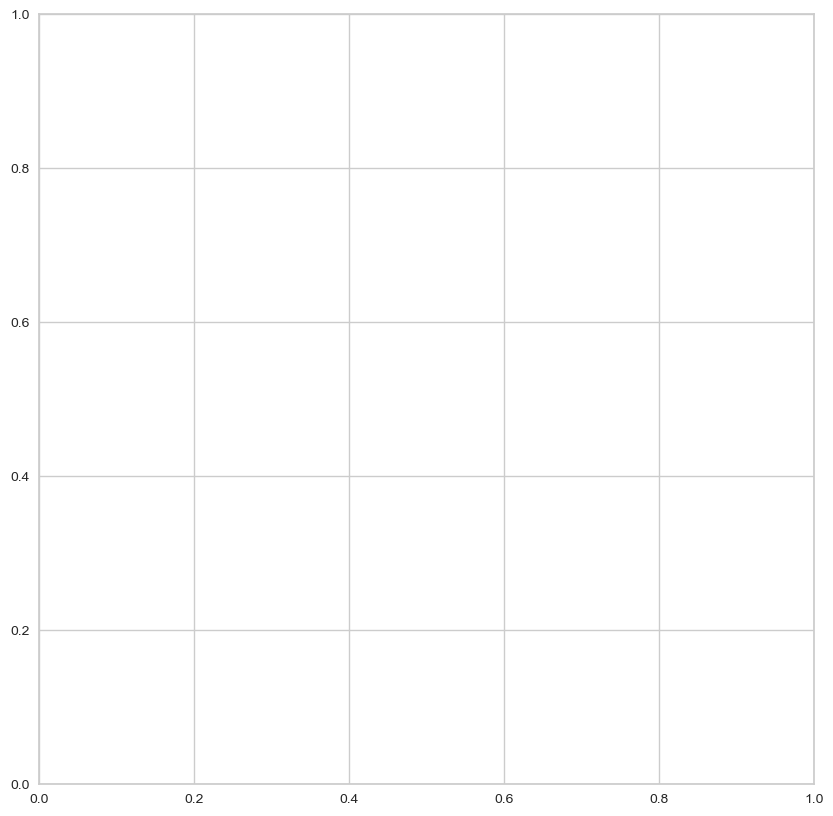

In [75]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 25,
  "X Axis Fontsize" : 25,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 30,
  "type"  : "Training"

}

Conf_Mat_percent(X_test,y_test,attributes,new_keys_6)

#Confusion Matrix For Training

In [76]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

In [77]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [78]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Tinnitus'
  return my_list

In [79]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

In [80]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [81]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i], lw = 5)

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])

  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=20, weight = 'bold')
  plt.yticks(fontsize=20, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [82]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

In [83]:
graph_feat={
    "Title Size":30,
    "Title Fontweight":'bold',

    "legend Font Size": 20,
    "legend Position": "lower right",
    "legend Fontweight":'bold',

    "X axis Label Font Size":25,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":25,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

ValueError: multi_class must be in ('ovo', 'ovr')



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)


Change  the given dictionary of graph feature for desire graph.

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

# **Performance Matrces_Test Dataset**

In [ ]:
model_compare = models_check_box(models)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure with a specific size

def plot_model_comp(df):
  plt.figure(figsize=(10, 7))
  ax = sns.barplot(data=df, x=df.columns[0], y=df.columns[1])

  ax.set_xlabel("Models", fontdict={'size': 30, 'weight': 'bold'})
  ax.set_ylabel("Scores", fontdict={'size': 30, 'weight': 'bold'})
  #ax.tick_params(axis='both', which='major', labelsize=14,fontweight='bold')


  plt.yticks(fontsize=20,fontweight='bold')
  plt.xticks(fontsize=20,fontweight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

  plt.show()







m=[]
acc=[]
precision_list=[]
recall_list=[]
f1_score_list=[]



for i in range(len(model_compare)):
  if model_compare[i].value ==True:
    y_pred = models[i].predict(X_test)
    m.append(str(models[i]).split('(')[0])
    acc.append(accuracy_score(y_pred,y_test))
    precision_list.append(precision_score(y_pred,y_test))
    recall_list.append(recall_score(y_pred,y_test))
    f1_score_list.append(f1_score(y_pred,y_test))




df_accu = {
    "Models" : m,
    "Accurecy" : acc,

}
df_accu = pd.DataFrame.from_dict(df_accu)


df_precision={
    "Models" : m,
    "Precision" : precision_list
}
df_precision = pd.DataFrame.from_dict(df_precision)

df_recall = {
    "Models" : m,
    "Recall" : recall_list
}
df_recall = pd.DataFrame.from_dict(df_recall)

df_f1_score = {
    "Models" : m,
    "f1_score" : f1_score_list
}
df_f1_score = pd.DataFrame.from_dict(df_f1_score)

##Accurecy

In [ ]:
plot_model_comp(df_accu)

##Precision

In [ ]:
plot_model_comp(df_precision)

##Recall

In [ ]:
plot_model_comp(df_recall)

##f1_score

In [ ]:
plot_model_comp(df_f1_score)

# **Voilin Plot_K-fold CV**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}


k=10
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  #l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring))
  #avg=sum(l)/k
  outcome = cross_validate(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring)
  #print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print(i[0], outcome)
  print("--------------------------------------------------------------------------")

In [ ]:
vio_plot_key=models_check_box(models)

In [ ]:



k =10
mod_outcomes = []
for i in range(len(vio_plot_key)):
  if vio_plot_key[i].value ==True:
    mod_outcomes.append((str(models[i]).split('(')[0],cross_validate(models[i],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring)))

mat_dic={
    'test_accuracy': "Accuracy",
    'test_precision':"Precision",
    'test_recall':"Recall",
    'test_f1_score':"F1-Score"
}



m = []
matrics = []
mat_score = []



for i in mod_outcomes:
  for j in i[1]:
    for l in i[1][j]:
      if j in mat_dic.keys():
        m.append(i[0])
        matrics.append(mat_dic[j])
        mat_score.append(l)


df={
    "Models" : m,
    "Matrics": matrics,
    "Scores":mat_score
}

df = pd.DataFrame.from_dict(df)




import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure with a specific size
plt.figure(figsize=(20, 8))

my_pal = {"GradientBoostingClassifier": "cyan", "HistGradientBoostingClassifier": "lime"}
ax = sns.violinplot(data=df, x="Matrics", y="Scores", hue="Models", palette=my_pal)
#ax = sns.violinplot(data=df, y="Performance Scores", hue="Models")

ax.set_xlabel("Matrics", fontdict={'size': 20, 'weight': 'bold'})
ax.set_ylabel("Performance Scores", fontdict={'size': 20, 'weight': 'bold'})
#ax.tick_params(axis='both', which='major', labelsize=14,fontweight='bold')


plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')

plt.legend(title='Models',fontsize= 15, title_fontproperties={'weight':'bold'})


plt.show()




# **CV_ROC**

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 5,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=25, weight = 'bold')
  plt.yticks(fontsize=25, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":30,
    "Title Fontweight":'bold',

    "legend Font Size": 20,
    "legend Position": "lower right",

    "X axis Label Font Size":25,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":25,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=10

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],10,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

# **LIME**

In [ ]:
!pip install lime

In [ ]:

def LIME_EXP(model,row):
  import lime
  from lime import lime_tabular


  if str(model)[:3] == "XGB":

    '''
    explainer = lime.lime_tabular.LimeTabularExplainer(
      X_train.values,
      feature_names=list(list(X_new.columns)),
      class_names=['Reading', 'Resting', 'Walking', 'Working']
      )

    exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                model.predict_proba,
                                num_features=6,
                                top_labels=2)'''
    print("Plz RUN XGboost cell....")
    return None

  else:
    explainer = lime_tabular.LimeTabularExplainer(
      training_data=np.array(X_train),
      feature_names=list(X_new.columns),
      class_names=['Control', 'Stroke'],
      mode='classification'
      )

    exp = explainer.explain_instance(X_test.iloc[row],
                                    model.predict_proba,
                                    num_features=6,
                                    top_labels=4)



  #exp.show_in_notebook(show_table=True, show_all=True)
  exp.show_in_notebook(show_table=True)


  import matplotlib.pyplot as plt
  with plt.style.context("ggplot"):
      exp.as_pyplot_figure()


  from IPython.display import HTML
  html_data = exp.as_html()
  HTML(data=html_data)

  exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME

In [ ]:

new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Control', 'Stroke'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_deafult.html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_depth.html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_estimator.html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_all.html")